In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
# Importing data
df = pd.read_csv('../data/train.csv')
df_val = pd.read_csv('../data/val.csv')

In [3]:
# Convert all categorical features to numerical ones.
numerical_features = ['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']
df_numerical = pd.DataFrame()
df_numerical[numerical_features] = df[numerical_features]
df_numerical['Gender'] = df['Gender'].map({"Female" : 0, "Male" : 1})
binary_categorical_features = ['H_Cal_Consump', 'Smoking', 'Fam_Hist', 'H_Cal_Burn'] # Yes or no
for feature in binary_categorical_features:
    df_numerical[feature] = df[feature].map({"no" : 0, "yes" : 1})
multi_categorical_features = ['Alcohol_Consump', 'Food_Between_Meals', 'Transport']
for feature in multi_categorical_features:
    values = (list(set(df[feature])))
    for value in values:
        df_numerical[feature+"_"+value] = df[feature].map(lambda x: 1 if x==value else 0)
df_numerical['Body_Level'] = df['Body_Level']

In [4]:
# Convert all categorical features to numerical ones. (for validation set)
numerical_features = ['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']
df_numerical_val = pd.DataFrame()
df_numerical_val[numerical_features] = df_val[numerical_features]
df_numerical_val['Gender'] = df_val['Gender'].map({"Female" : 0, "Male" : 1})
binary_categorical_features = ['H_Cal_Consump', 'Smoking', 'Fam_Hist', 'H_Cal_Burn'] # Yes or no
for feature in binary_categorical_features:
    df_numerical_val[feature] = df_val[feature].map({"no" : 0, "yes" : 1})
multi_categorical_features = ['Alcohol_Consump', 'Food_Between_Meals', 'Transport']
for feature in multi_categorical_features:
    values = (list(set(df_val[feature])))
    for value in values:
        df_numerical_val[feature+"_"+value] = df_val[feature].map(lambda x: 1 if x==value else 0)
df_numerical_val['Body_Level'] = df_val['Body_Level']

In [5]:
features = list(df_numerical.columns.array)
features.reverse()
label = features.pop(0)
features.reverse()
# An extra step done for the validation set since it may not contain all the categories of a specific attribute due to its smaller size.
for feature in features:
    if feature not in list(df_numerical_val.columns.array):
        df_numerical_val[feature] = 0

In [6]:
x_train = df_numerical[features]
y_train = df_numerical['Body_Level']
x_val = df_numerical_val[features]
y_val = df_numerical_val['Body_Level']

### Default Hyper Parameters: criterion="gini", plitter="best", max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0

In [7]:
# Training
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train, y_train)

# Prediction
dtree_predictions = dtree_model.predict(x_val)
print("Tree Depth =",dtree_model.get_depth())

Tree Depth = 11


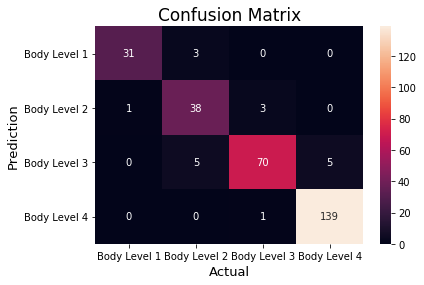

In [8]:
# Compute the confusion matrix.
cm = confusion_matrix(y_val,dtree_predictions)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [9]:
# Finding the accuracy.
accuracy = accuracy_score(y_val,dtree_predictions)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(y_val,dtree_predictions)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.9391891891891891
Precision : [0.96875    0.82608696 0.94594595 0.96527778] Macro Precision : 0.9265151700613657
Recall    : [0.91176471 0.9047619  0.875      0.99285714] Macro Recall    : 0.9210959383753501
F1-score  : [0.93939394 0.86363636 0.90909091 0.97887324] Macro F1-score  : 0.922748612889458
Support  : [ 34  42  80 140] Macro Support  : 74.0


### Same as default but criterion="entropy" (which is better for multiclass instead of log_loss)

In [16]:
# Training
dtree_model = DecisionTreeClassifier(criterion="entropy")
dtree_model.fit(x_train, y_train)

# Prediction
dtree_predictions = dtree_model.predict(x_val)
print("Tree Depth =",dtree_model.get_depth())

Tree Depth = 8


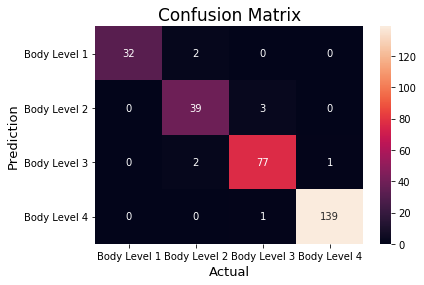

In [17]:
# Compute the confusion matrix.
cm = confusion_matrix(y_val,dtree_predictions)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [18]:
# Finding the accuracy.
accuracy = accuracy_score(y_val,dtree_predictions)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(y_val,dtree_predictions)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.9695945945945946
Precision : [1.         0.90697674 0.95061728 0.99285714] Macro Precision : 0.9626127927484516
Recall    : [0.94117647 0.92857143 0.9625     0.99285714] Macro Recall    : 0.9562762605042017
F1-score  : [0.96969697 0.91764706 0.95652174 0.99285714] Macro F1-score  : 0.9591807276270192
Support  : [ 34  42  80 140] Macro Support  : 74.0
